# Imports

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings(action='ignore')

# Grab the data

In [2]:
audible_cleaned = pd.read_csv('/kaggle/input/audible-dataset/audible_cleaned.csv')
audible_uncleaned = pd.read_csv('/kaggle/input/audible-dataset/audible_uncleaned.csv')

In [3]:
audible_cleaned

,name,author,narrator,time,releasedate,language,stars,price,ratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008-04-08,English,5.0,468.0,34.0
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018-01-05,English,4.5,820.0,41.0
2,The Deep End,JeffKinney,DanRussell,123,2020-06-11,English,4.5,410.0,38.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021-05-10,English,4.5,615.0,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010-01-13,English,4.5,820.0,181.0
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,454,2017-09-03,English,0.0,596.0,0.0
87485,The Alps,StephenO'Shea,RobertFass,607,2017-02-21,English,0.0,820.0,0.0
87486,The Innocents Abroad,MarkTwain,FloGibson,1144,2016-12-30,English,0.0,938.0,0.0
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,248,2011-02-23,English,0.0,680.0,0.0


In [4]:
audible_uncleaned

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Writtenby:ChrisStewart,Narratedby:ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,Writtenby:StephenO'Shea,Narratedby:RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,Writtenby:MarkTwain,Narratedby:FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,Writtenby:LaurenceSterne,Narratedby:AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


I will work with audible_uncleaned data, I will try to clean it, create a new column as clean one 

In [5]:
audible_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


# Actions
1. price need to be float 
2. release date need to be date 
3. Remove extra word Writtenby from Author column and Narratedby from Narrator column
4. time column is object, I will change it to int


## price need to be float 

In [6]:
audible_uncleaned.price = audible_uncleaned.price.str.replace(',','').str.replace('Free','0.00').astype(float)

## release date need to be date

In [7]:
audible_uncleaned['release_date']= pd.to_datetime(audible_uncleaned.releasedate, dayfirst=True)
audible_uncleaned['release_date']

0       2008-08-04
1       2018-05-01
2       2020-11-06
3       2021-10-05
4       2010-01-13
           ...    
87484   2017-03-09
87485   2017-02-21
87486   2016-12-30
87487   2011-02-23
87488   2017-03-07
Name: release_date, Length: 87489, dtype: datetime64[ns]

## Remove extra word Writtenby from Author column and Narratedby from Narrator column

In [8]:
audible_uncleaned.author = audible_uncleaned.author.str.replace('Writtenby:', '')
audible_uncleaned.narrator = audible_uncleaned.author.str.replace('Narratedby:', '')

In [9]:
## let's check how many time we use hr in time column 
hrs = 0
m = 0
for idx, time in enumerate(audible_uncleaned.time):
    if 'hr' in time:
        hrs+=1
    else:
        print(idx)
        break
    
    if 'min' in time:
        m +=1
print(f'hrs = {hrs}, mins = {m}')

53
hrs = 53, mins = 52


## time column is object, I will change it to int

In [10]:
def fixing_time(time):
    numbers = re.findall(r'\d+',time)
    if 'hr' in time and 'min' in time :
        t = float(numbers[0])*60 + float(numbers[1])
    elif 'hr' in time :
        t = float(numbers[0])*60
    elif 'min' in time :
        t = float(numbers[0])
    return t
audible_uncleaned['mins'] = audible_uncleaned.time.apply(fixing_time)

In [11]:
audible_uncleaned

,name,author,narrator,time,releasedate,language,stars,price,release_date,mins
0,Geronimo Stilton #11 & #12,GeronimoStilton,GeronimoStilton,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.0,2008-08-04,140.0
1,The Burning Maze,RickRiordan,RickRiordan,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.0,2018-05-01,788.0
2,The Deep End,JeffKinney,JeffKinney,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.0,2020-11-06,123.0
3,Daughter of the Deep,RickRiordan,RickRiordan,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.0,2021-10-05,676.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,RickRiordan,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.0,2010-01-13,600.0
...,...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.0,2017-03-09,454.0
87485,The Alps,StephenO'Shea,StephenO'Shea,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.0,2017-02-21,607.0
87486,The Innocents Abroad,MarkTwain,MarkTwain,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.0,2016-12-30,1144.0
87487,A Sentimental Journey,LaurenceSterne,LaurenceSterne,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.0,2011-02-23,248.0


In [ ]:
audible_uncleaned.stars.value_counts()

## stars column has 2 valuable values, the rate and votes, so lets seperate them

In [12]:
def stars_clean(rate):
    rate = rate.replace(',','')
    if 'Not rated yet' in rate:
        return 0,0
    else:
        r = rate.split('stars')[0]
        v= rate.split('stars')[1]
        
        r = float(r.split(' out of ')[0])/float(r.split(' out of ')[1])
        if 'ratings' in v:
            v= int(v.split(' ratings')[0])
        else:
            v= int(v.split(' rating')[0])
        
        
        return r,v

In [13]:
audible_uncleaned[['rates', 'votes']]=audible_uncleaned.stars.apply(lambda x: pd.Series(stars_clean(x)))

## adding 2 columns one for [month, year] 

In [14]:
audible_uncleaned['year'] = audible_uncleaned.release_date.dt.year
audible_uncleaned['month'] = audible_uncleaned.release_date.dt.month

In [15]:
audible_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   time          87489 non-null  object        
 4   releasedate   87489 non-null  object        
 5   language      87489 non-null  object        
 6   stars         87489 non-null  object        
 7   price         87489 non-null  float64       
 8   release_date  87489 non-null  datetime64[ns]
 9   mins          87489 non-null  float64       
 10  rates         87489 non-null  float64       
 11  votes         87489 non-null  float64       
 12  year          87489 non-null  int32         
 13  month         87489 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), object(7)
memory usage: 8.7+ MB


# Visualization 

## let's remove duplicated [old] columns

In [16]:
audible_uncleaned = audible_uncleaned.drop(['stars', 'time', 'releasedate'], axis = 1)
audible_uncleaned

,name,author,narrator,language,price,release_date,mins,rates,votes,year,month
0,Geronimo Stilton #11 & #12,GeronimoStilton,GeronimoStilton,English,468.0,2008-08-04,140.0,1.0,34.0,2008,8
1,The Burning Maze,RickRiordan,RickRiordan,English,820.0,2018-05-01,788.0,0.9,41.0,2018,5
2,The Deep End,JeffKinney,JeffKinney,English,410.0,2020-11-06,123.0,0.9,38.0,2020,11
3,Daughter of the Deep,RickRiordan,RickRiordan,English,615.0,2021-10-05,676.0,0.9,12.0,2021,10
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,RickRiordan,English,820.0,2010-01-13,600.0,0.9,181.0,2010,1
...,...,...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,English,596.0,2017-03-09,454.0,0.0,0.0,2017,3
87485,The Alps,StephenO'Shea,StephenO'Shea,English,820.0,2017-02-21,607.0,0.0,0.0,2017,2
87486,The Innocents Abroad,MarkTwain,MarkTwain,English,938.0,2016-12-30,1144.0,0.0,0.0,2016,12
87487,A Sentimental Journey,LaurenceSterne,LaurenceSterne,English,680.0,2011-02-23,248.0,0.0,0.0,2011,2


In [17]:
audible_uncleaned.describe()

,price,release_date,mins,rates,votes,year,month
count,87489.000000,87489,87489.000000,87489.000000,87489.000000,87489.000000,87489.000000
mean,559.009246,2018-06-23 22:53:20.411480064,417.497663,0.153562,3.723371,2017.987393,6.414155
min,0.000000,1998-12-27 00:00:00,1.000000,0.000000,0.000000,1998.000000,1.000000
25%,268.000000,2016-09-06 00:00:00,142.000000,0.000000,0.000000,2016.000000,3.000000
50%,585.000000,2020-02-06 00:00:00,386.000000,0.000000,0.000000,2020.000000,6.000000
75%,755.000000,2021-08-17 00:00:00,584.000000,0.000000,0.000000,2021.000000,10.000000
max,7198.000000,2025-11-14 00:00:00,8595.000000,1.000000,12573.000000,2025.000000,12.000000
std,336.096642,NaN,364.559399,0.341928,86.499601,4.258215,3.573881


## let's see the distribution 

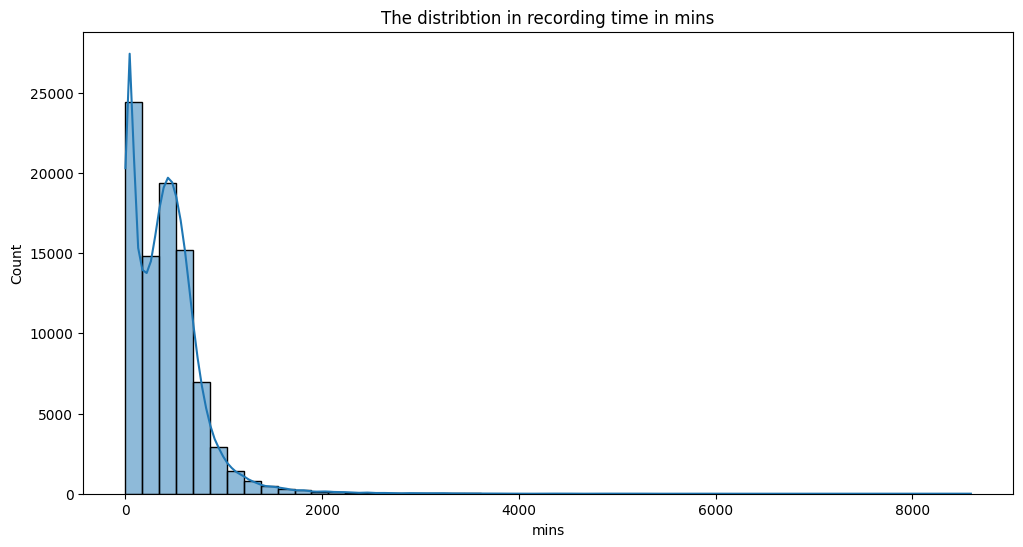

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(data= audible_uncleaned, x= 'mins', bins=50,kde=True )
plt.title('The distribtion in recording time in mins')
plt.show()

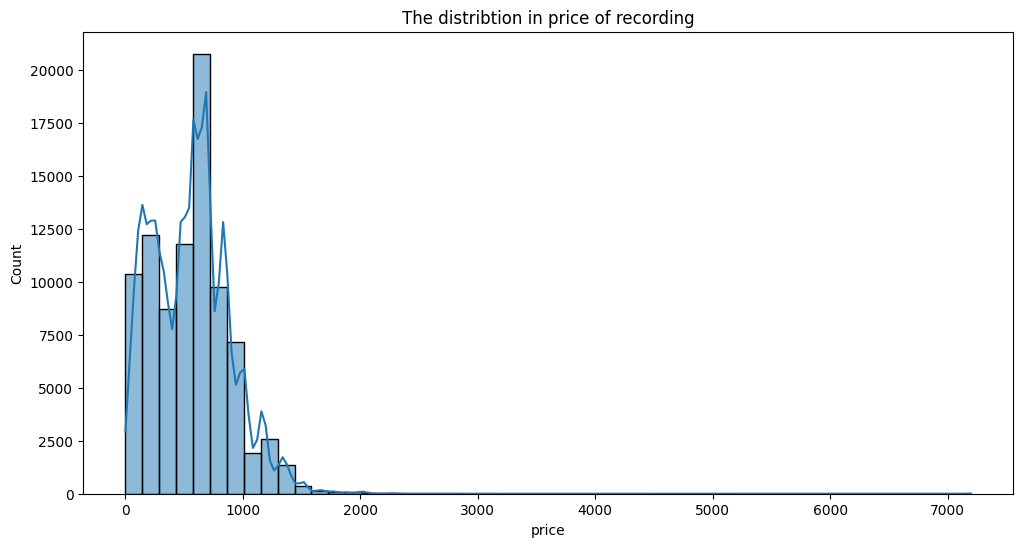

In [19]:
plt.figure(figsize=(12,6))
sns.histplot(data= audible_uncleaned, x= 'price', bins=50,kde= True )
plt.title('The distribtion in price of recording')
plt.show()

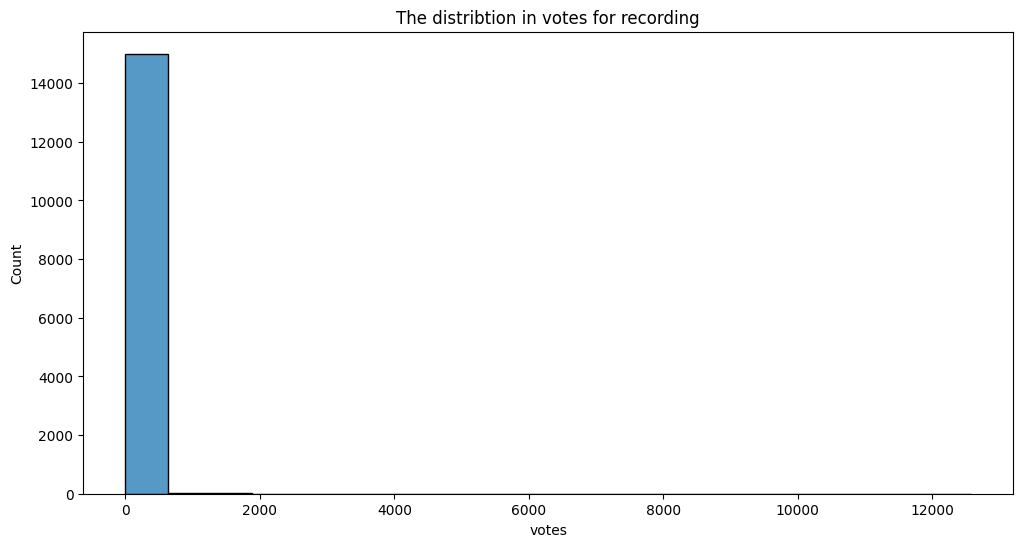

In [20]:
# let's remove not rated audio 
data = audible_uncleaned.drop(audible_uncleaned[audible_uncleaned.votes ==0].index, axis=0)
plt.figure(figsize=(12,6))
sns.histplot(data= data, x= 'votes', bins=20)
plt.title('The distribtion in votes for recording')
plt.ylabel('Counts of reseased audio')
plt.xlabel('Numbers of votes ')
plt.show()

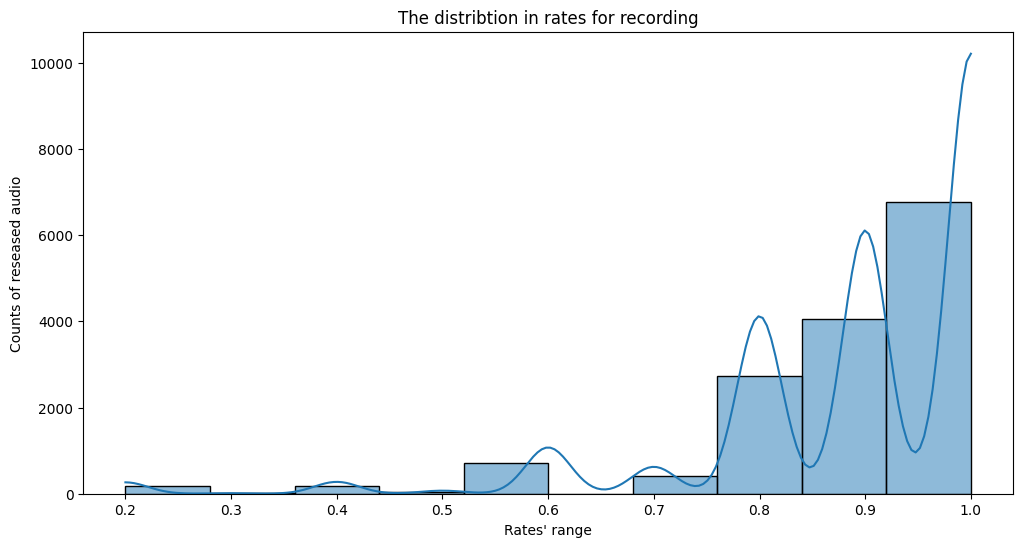

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(data= data, x= 'rates', bins=10, kde=True )
plt.title('The distribtion in rates for recording')
plt.ylabel('Counts of reseased audio')
plt.xlabel('Rates\' range')
plt.show()

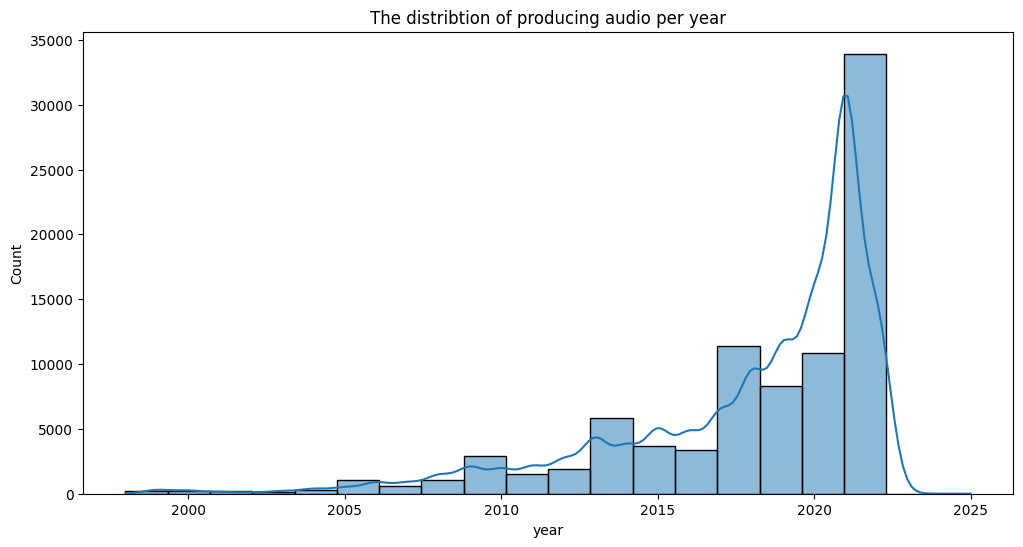

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(data= audible_uncleaned, x= 'year', bins=20,kde=True )
plt.title('The distribtion of producing audio per year')
plt.ylabel('Counts of reseased audio')
plt.xlabel(' years')
plt.show()

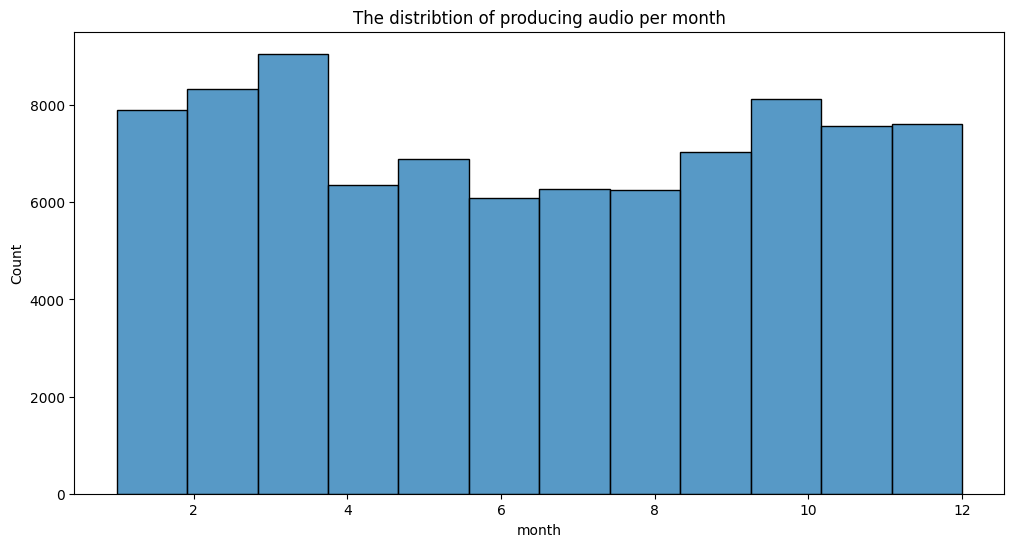

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(data= audible_uncleaned, x= 'month', bins=12)
plt.title('The distribtion of producing audio per month')
plt.ylabel('Counts of reseased audio')
plt.xlabel('Months of a year')
plt.show()

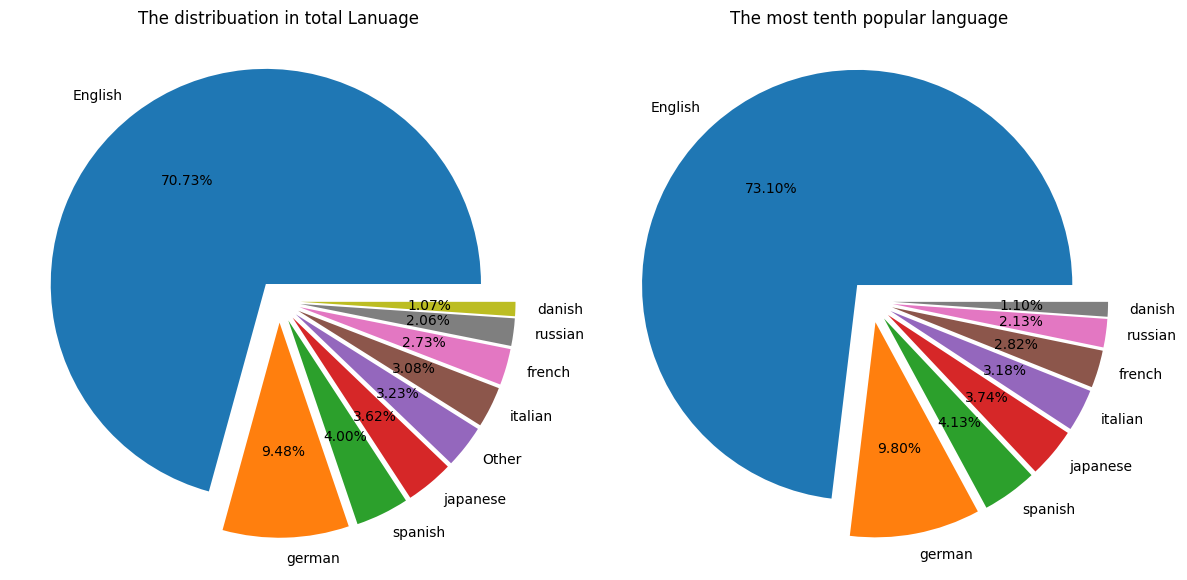

In [24]:
# let's handle the language, we will take the first 5 languages and other languages as other
n= 8
eng_data = audible_uncleaned.language.value_counts()
popular_10_lang = eng_data[:n]
def change_lang(lang):
    if lang in popular_10_lang.index:
        return lang
    else:
        return 'Other'
audible_uncleaned['new_lang']=audible_uncleaned.language.apply(change_lang) 
total_lang = audible_uncleaned.new_lang.value_counts()
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.pie(x= total_lang.values,explode=[0.1]*(n+1), labels=total_lang.index, autopct='%1.2f%%')
plt.title('The distribuation in total Lanuage')
plt.subplot(1,2,2)
plt.pie(x= popular_10_lang.values,explode=[0.1]*n, labels=popular_10_lang.index,autopct='%1.2f%%')
plt.title('The most tenth popular language ')
plt.tight_layout()
plt.show()



from visulization we can see production increases in last years, and almost stable during months maybe a little higher in beginning and end of the year, Also most of ratings go above average.
More than 75% of data less than 7 votes, and most of data less than 1000$  

## let's visualize relation between columns 

In [25]:
audible_uncleaned.votes.value_counts().sort_index()

votes
0.0        72417
1.0         5822
2.0         2315
3.0         1207
4.0          857
           ...  
5972.0         1
5973.0         1
6981.0         1
12569.0        1
12573.0        1
Name: count, Length: 385, dtype: int64

In [26]:
# let's make levels for votes 
def level_votes(vote):
    if vote== 0:
        return '0'
    elif vote <100:
        return '100'
    elif vote <1000:
        return '1000'
    elif vote <10000:
        return '10000'
    else: return '+10000'
audible_uncleaned['level_vote'] =audible_uncleaned.votes.apply(level_votes)


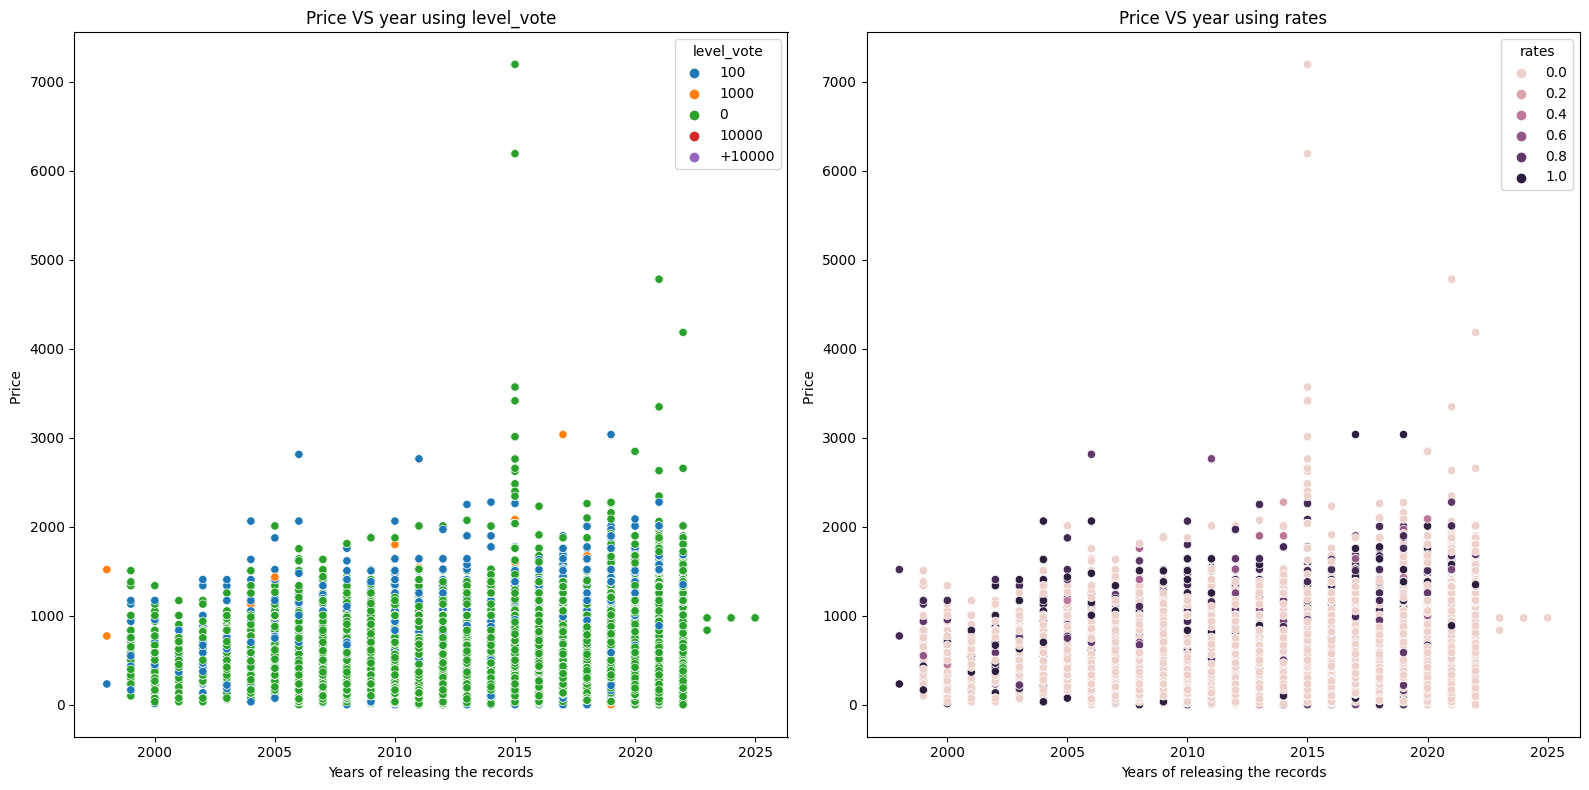

In [35]:
# does years effect the price , what is the effect of the votes ?
hues = ['level_vote', 'rates']
plt.figure(figsize=(16,8))
for i,hue in enumerate(hues):
    plt.subplot(1,2,i+1)
    sns.scatterplot(data=audible_uncleaned, x= 'year', y = 'price', hue=hue)
    plt.title(f'Price VS year using {hue}')
    plt.ylabel('Price ')
    plt.xlabel('Years of releasing the records')
plt.tight_layout()
plt.show()

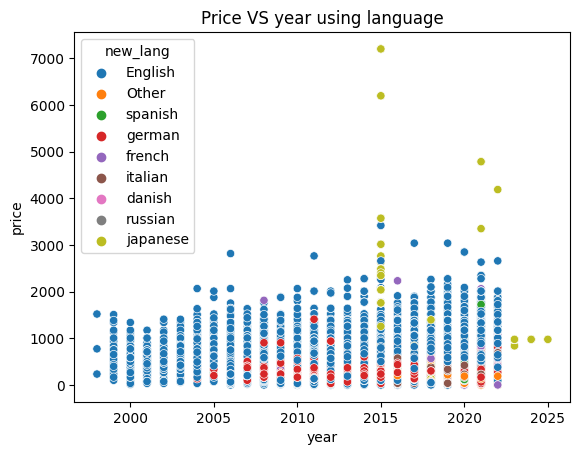

In [28]:
# does years effect the price based on country ?

sns.scatterplot(data=audible_uncleaned, x= 'year', y = 'price', hue='new_lang')
plt.title(f'Price VS year using language')
plt.ylabel('Price ')
plt.xlabel('Years of releasing the records')
plt.show()

In [29]:
audible_uncleaned

,name,author,narrator,language,price,release_date,mins,rates,votes,year,month,new_lang,level_vote
0,Geronimo Stilton #11 & #12,GeronimoStilton,GeronimoStilton,English,468.0,2008-08-04,140.0,1.0,34.0,2008,8,English,100
1,The Burning Maze,RickRiordan,RickRiordan,English,820.0,2018-05-01,788.0,0.9,41.0,2018,5,English,100
2,The Deep End,JeffKinney,JeffKinney,English,410.0,2020-11-06,123.0,0.9,38.0,2020,11,English,100
3,Daughter of the Deep,RickRiordan,RickRiordan,English,615.0,2021-10-05,676.0,0.9,12.0,2021,10,English,100
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,RickRiordan,English,820.0,2010-01-13,600.0,0.9,181.0,2010,1,English,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,English,596.0,2017-03-09,454.0,0.0,0.0,2017,3,English,0
87485,The Alps,StephenO'Shea,StephenO'Shea,English,820.0,2017-02-21,607.0,0.0,0.0,2017,2,English,0
87486,The Innocents Abroad,MarkTwain,MarkTwain,English,938.0,2016-12-30,1144.0,0.0,0.0,2016,12,English,0
87487,A Sentimental Journey,LaurenceSterne,LaurenceSterne,English,680.0,2011-02-23,248.0,0.0,0.0,2011,2,English,0


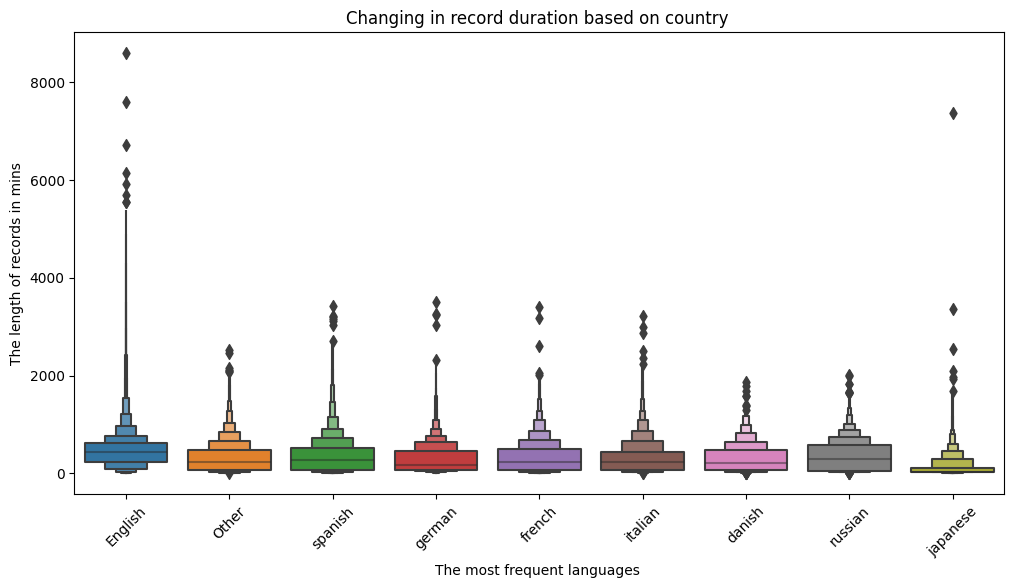

In [32]:
plt.figure(figsize=(12,6))
sns.boxenplot(audible_uncleaned, x='new_lang', y ='mins')
plt.title('Changing in record duration based on country ')
plt.ylabel('The length of records in mins')
plt.xlabel('The most frequent languages ')
plt.xticks(rotation=45)
plt.show()

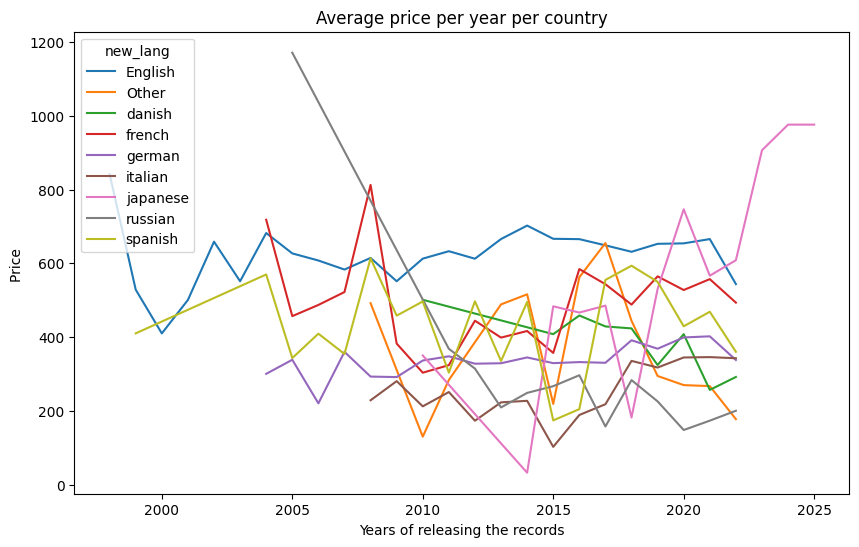

In [34]:
avg_duration_country = audible_uncleaned.groupby(['new_lang', 'year'])['price'].agg('mean').reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_duration_country, x= 'year', y = 'price', hue= 'new_lang')
plt.ylabel('Price ')
plt.xlabel('Years of releasing the records')
plt.title('Average price per year per country')
plt.show()